In [1]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np



2023-01-26 11:52:19.077543: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# images are 256 x 256, greyscale
# create augmentation environment
training_data_generator = ImageDataGenerator(rescale = 1./256, zoom_range = 0.2,
                                             rotation_range = 15,
                                             width_shift_range = 0.08,
                                             height_shift_range = 0.08)

test_data_generator = ImageDataGenerator(rescale = 1./256, zoom_range = 0.2,
                                         rotation_range = 15,
                                         width_shift_range = 0.08,
                                         height_shift_range = 0.08)

# load the data & augment
dir_train = "./Covid19-dataset/train/"
dir_test = "./Covid19-dataset/test/"
batch_images = 4

training_iterator = training_data_generator.flow_from_directory(dir_train,
                                                                class_mode = 'categorical',
                                                                color_mode = 'grayscale',
                                                                batch_size = batch_images)
test_iterator = test_data_generator.flow_from_directory(dir_test,
                                                        class_mode = 'categorical',
                                                        color_mode = 'grayscale',
                                                        batch_size = batch_images)




Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [3]:
####
### Creating classification neural network
####

model = Sequential()

# input layer
# 256 x 256 images, greyscale
model.add(Input(shape = training_iterator.image_shape))

# two Conv2D layers with MaxPooling2D sandwitch
model.add(layers.Conv2D(4, 3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=3))
model.add(layers.Conv2D(4, 3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=3))
model.add(Flatten())

#model.add(Dense(16, activation='relu'))

# output layer
# three different classifications
# using 'softmax' to obtain probs
model.add(Dense(3, activation = "softmax"))

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 4)       40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 4)         148       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 4)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2916)              0         
                                                                 
 dense (Dense)               (None, 3)                 8

2023-01-26 11:52:32.358706: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
### compile
# using Adam optimisation

model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
        loss = tf.keras.losses.CategoricalCrossentropy(),
        metrics = [tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()]
        )


In [5]:
####
### Fitting model
####


# add early stopping rule
callback = EarlyStopping(monitor = 'categorical_accuracy', patience = 25)

history = model.fit(training_iterator,
                    steps_per_epoch = training_iterator.samples / batch_images,
                    epochs = 100, 
                    validation_data = test_iterator,
                    validation_steps = test_iterator.samples / batch_images,
                    callbacks = [callback])




Epoch 1/100
62/62 [==============================] - 8s 99ms/step - loss: 1.1418 - categorical_accuracy: 0.4542 - auc: 0.5906 - val_loss: 1.1013 - val_categorical_accuracy: 0.3939 - val_auc: 0.5440
Epoch 2/100
62/62 [==============================] - 6s 92ms/step - loss: 1.0758 - categorical_accuracy: 0.4422 - auc: 0.5741 - val_loss: 1.0954 - val_categorical_accuracy: 0.3939 - val_auc: 0.5481
Epoch 3/100
62/62 [==============================] - 6s 95ms/step - loss: 1.0773 - categorical_accuracy: 0.4422 - auc: 0.5698 - val_loss: 1.0946 - val_categorical_accuracy: 0.3939 - val_auc: 0.5478
Epoch 4/100
62/62 [==============================] - 5s 82ms/step - loss: 1.0778 - categorical_accuracy: 0.4422 - auc: 0.5516 - val_loss: 1.0952 - val_categorical_accuracy: 0.3939 - val_auc: 0.5455
Epoch 5/100
62/62 [==============================] - 5s 83ms/step - loss: 1.0795 - categorical_accuracy: 0.4422 - auc: 0.5530 - val_loss: 1.0935 - val_categorical_accuracy: 0.3939 - val_auc: 0.5481
Epoch 6/10

62/62 [==============================] - 7s 112ms/step - loss: 0.4530 - categorical_accuracy: 0.8446 - auc: 0.9483 - val_loss: 0.7157 - val_categorical_accuracy: 0.7424 - val_auc: 0.9086
Epoch 43/100
62/62 [==============================] - 7s 108ms/step - loss: 0.3309 - categorical_accuracy: 0.8725 - auc: 0.9694 - val_loss: 0.4226 - val_categorical_accuracy: 0.8788 - val_auc: 0.9537
Epoch 44/100
62/62 [==============================] - 7s 105ms/step - loss: 0.3656 - categorical_accuracy: 0.8566 - auc: 0.9632 - val_loss: 0.5401 - val_categorical_accuracy: 0.8636 - val_auc: 0.9366
Epoch 45/100
62/62 [==============================] - 7s 105ms/step - loss: 0.3189 - categorical_accuracy: 0.8765 - auc: 0.9727 - val_loss: 0.8199 - val_categorical_accuracy: 0.7273 - val_auc: 0.9094
Epoch 46/100
62/62 [==============================] - 7s 112ms/step - loss: 0.3250 - categorical_accuracy: 0.8606 - auc: 0.9702 - val_loss: 0.4040 - val_categorical_accuracy: 0.8939 - val_auc: 0.9617
Epoch 47/100


/var/folders/gl/gg126_x15pqfgb8m_4wzfnnh0000gn/T/ipykernel_9433/1460823092.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


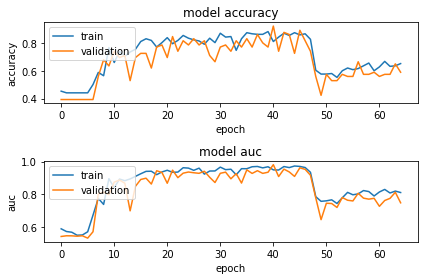

In [6]:

####
### Plot
####
%matplotlib inline


# plotting categorical and validation accuracy over epochs
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['categorical_accuracy'])
ax1.plot(history.history['val_categorical_accuracy'])
ax1.set_title('model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='upper left')

# plotting auc and validation auc over epochs
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['auc'])
ax2.plot(history.history['val_auc'])
ax2.set_title('model auc')
ax2.set_xlabel('epoch')
ax2.set_ylabel('auc')
ax2.legend(['train', 'validation'], loc='upper left')

# used to keep plots from overlapping
fig.tight_layout()

fig.show()

#fig.savefig('accuracy_plot.png')



In [7]:
####
### Confusion matrix
####

test_steps_per_epoch = np.math.ceil(test_iterator.samples / test_iterator.batch_size)
predictions = model.predict(test_iterator, steps=test_steps_per_epoch)
test_steps_per_epoch = np.math.ceil(test_iterator.samples / test_iterator.batch_size)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_iterator.classes
class_labels = list(test_iterator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

cm=confusion_matrix(true_classes,predicted_classes)
print(cm)

17/17 [==============================] - 1s 60ms/step
              precision    recall  f1-score   support

       Covid       0.39      0.50      0.44        26
      Normal       0.36      0.20      0.26        20
   Pneumonia       0.27      0.30      0.29        20

    accuracy                           0.35        66
   macro avg       0.34      0.33      0.33        66
weighted avg       0.35      0.35      0.34        66

[[13  4  9]
 [ 9  4  7]
 [11  3  6]]
